In [1]:
import os
import sys

import numpy as np


project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
app_root = os.path.abspath(os.path.join(project_root, '../../app', '..'))

if project_root not in sys.path:
    sys.path.append(project_root)
    sys.path.append(app_root)

## Przetwarzanie danych w postaci JSON do ramki danych pandaa

In [2]:
import pandas as pd

math_df = pd.read_csv(os.path.join('../datasets_preprocessing/csv_question_files', 'math.csv'))
math_df.head(10)

,question,tags_str,math,bio,code
0,Function on the unit circle and exponential,"complex-analysis,continuity",1,0,0
1,What does $\sum_{n=0}^\infty 1/n^n$ converge to?,"sequences-and-series,number-theory,limits",1,0,0
2,Random variable measurable with respect to sto...,"measure-theory,random-variables,stopping-times...",1,0,0
3,What is the distribution of 2 consecutive Bino...,"probability,binomial-coefficients,binomial-dis...",1,0,0
4,Determine lines intersecting four skew lines i...,"projective-geometry,projective-space,cross-ratio",1,0,0
5,How do you deal with absolute values in a func...,"calculus,solid-of-revolution",1,0,0
6,Aren't $ f’(xy) $ and $ f’(x/y)$ ambiguous not...,"multivariable-calculus,functions",1,0,0
7,Why do counits go that way?,"soft-question,category-theory,education,adjoin...",1,0,0
8,Not understanding a proof about coherent sheav...,"algebraic-geometry,proof-explanation,schemes,s...",1,0,0
9,Model theory of the naturals with a multiplica...,"model-theory,first-order-logic,nonstandard-models",1,0,0


In [3]:
bio_df = pd.read_csv(os.path.join('../datasets_preprocessing/csv_question_files', 'bio.csv'))
bio_df.head(10)

,question,tags_str,math,bio,code
0,How many kg of seed can one expect from 230 kg...,agriculture,0,1,0
1,Adaptive Optics in Microscopy: what are the fa...,"biophysics,microscopy,fluorescent-microscopy,o...",0,1,0
2,Which part of the reflex arc takes the longest...,"human-biology,reflexes",0,1,0
3,Is wiping with RNAse Zap enough to destroy RNA...,"molecular-biology,lab-techniques,rna,lab-reagents",0,1,0
4,When there is incomplete dominance of one alle...,"genetics,terminology",0,1,0
5,Does drinking dry water have same effect as dr...,"human-biology,food",0,1,0
6,Do non-migratory canada geese still exhibit mi...,"ornithology,migration",0,1,0
7,"If life is discovered on another planet, will ...","taxonomy,astrobiology",0,1,0
8,Why do toenails grow much slower than fingerna...,"human-biology,human-anatomy",0,1,0
9,"Why do, humans, like many birds,tend to stand ...","brain,muscles,balance",0,1,0


In [4]:
code_df = pd.read_csv(os.path.join('../datasets_preprocessing/csv_question_files', 'code.csv'))
code_df.head(10)

,question,tags_str,math,bio,code
0,WorkGroup Data Service with JSON / Web based API,"c#,linq,json",0,0,1
1,Design pattern for logger implementation,"object-oriented,design-patterns,salesforce-apex",0,0,1
2,Temperature calculator in Rust,"beginner,rust,unit-conversion",0,0,1
3,Read binary serial data and parse integers,"c#,serial-port",0,0,1
4,Brain-flak interpreter,"parsing,go,interpreter",0,0,1
5,Implement bash auto completion in Python,"python,python-3.x,bash,autocomplete",0,0,1
6,How well or poorly structured are my routes in...,"javascript,node.js",0,0,1
7,“Proper” Asynchronous implementation,"c#,asynchronous",0,0,1
8,Determining whether a loop iterated at least o...,"python,python-3.x,generator",0,0,1
9,Output JavaScript object into HTML table of ke...,"javascript,jquery",0,0,1


## Tutaj ustawiamy który model chcemy trenować

In [5]:
target_category = 'math' # allowed values: 'math' 'bio' 'code'

In [6]:
n_samples = 6000 # target class will get this many questions, other will get half of it for balance
half_samples = n_samples // 2

full_df = pd.concat(
	[
		math_df.sample(n=n_samples if target_category == 'math' else half_samples, random_state=42),
		bio_df.sample(n=n_samples if target_category == 'bio' else half_samples , random_state=42),
		code_df.sample(n=n_samples if target_category == 'code' else half_samples, random_state=42)
	],
    ignore_index=True,
	axis=0
)

full_df

,question,tags_str,math,bio,code
0,"$2\left|f'(0)\right|=\sup_{z,\omega \in \mathb...",complex-analysis,1,0,0
1,Is there a principal maximal ideal in $\mathbb...,"polynomials,commutative-algebra,field-theory,f...",1,0,0
2,How to check if a set of vectors is a basis,"linear-algebra,vector-spaces",1,0,0
3,"Why does $S(n,k)=\sum 1^{a_1-1}2^{a_2-1}\cdots...","combinatorics,integer-partitions,stirling-numbers",1,0,0
4,Showing a morphism is birational,algebraic-geometry,1,0,0
...,...,...,...,...,...
11995,Quick Sort Implementation C++11,"c++,c++11,quick-sort",0,0,1
11996,Difference between Non R.E and Co-R.E,"computability,turing-machines",0,0,1
11997,Efficiently read in 2nd column of CSV into Lis...,"python,performance,python-3.x,array,file",0,0,1
11998,"Setting the path to toolbarAssociatedXibName, ...","objective-c,comparative-review,delegates,cocoa",0,0,1


In [7]:
full_df[target_category].value_counts()

math
1    6000
0    6000
Name: count, dtype: int64

## SVM + TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from train.reporting.model_interface import ModelInterface
from sklearn.svm import SVC

In [9]:
from train.reporting.text_svm_wrapper import TextSVMWrapper
from train.reporting.model_reporter import ModelReporter

report_df = full_df

reporter = ModelReporter(TextSVMWrapper(), report_df['question'],
                         report_df[target_category])


In [10]:
reporter.generate_report()

[INFO] Raport zostanie zapisany w: reports/2026-01-29_20-28-34_TextSVMWrapper
Raport wygenerowany: 2026-01-29 20:28:34.278944
Model Wrapper: TextSVMWrapper
------------------------------
--- Rozpoczynanie treningu ---
Trening zakończony.
[INFO] Brak historii funkcji straty (Loss History). Pomijam wykres.
Zapisano macierz pomyłek: reports/2026-01-29_20-28-34_TextSVMWrapper/confusion_matrix.png

--- Uruchamianie 5-krotnej walidacji krzyżowej ---
Fold 5: 0.9075
Wyniki CV: [np.float64(0.9020833333333333), np.float64(0.89875), np.float64(0.89625), np.float64(0.9045833333333333), np.float64(0.9075)]
Średnia dokładność: 0.9018 (+/- 0.0040)

--- Top 10 Ważność cech ---
probability: 3.4926
complexity: 3.0137
integral: 2.8710
algorithm: 2.6060
tree: 2.5940
array: 2.5692
ode: 2.4890
frac: 2.4536
mathbb: 2.4152
python: 2.3782
Generowanie wykresu 2D dla topowych cech (wersja uniwersalna)...
Wybrano cechy do wykresu: 'probability' oraz 'complexity'
Zapisano wykres 2D: reports/2026-01-29_20-28-34_Tex

In [11]:
# reporter.plot_tsne()

In [12]:
# reporter.plot_wordclouds()

In [13]:
reporter.plot_confusion_matrix_with_0_as_few_classes(report_df.drop(columns=[target_category, "tags_str"])
                                                     .drop_duplicates(subset=["question"]))

Zapisano wykres korelacji predykcji z klasami: reports/2026-01-29_20-28-34_TextSVMWrapper/prediction_vs_true_class_correlation.png


Zapisano rozkład pewności modelu: reports/2026-01-29_20-28-34_TextSVMWrapper/confidence_distr_plot.png


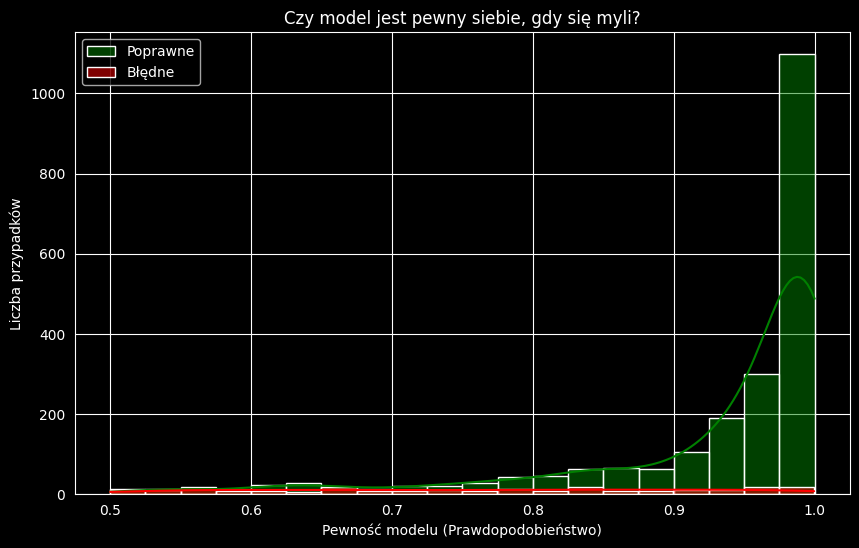

In [14]:
reporter.plot_confidence_distribution()